# Probability 2 (Data science Master, University of Lille) / CMF, (Centrale Lille, G3 SDIA)

---

## Lab 1 - Discrete time homogeneous Markov chains

---

## Guidelines (read carefully before starting)

**Objectives**: numerically simulate basic Markov chains (discrete time and discrete state space).

**Setup**: after retrieving the resources for the lab on moodle:
- place the .zip archive in a local folder (Computer -> Documents/Python/);
- unzip the archive .zip;
- rename the folder with the convention lab1_Name1_Name2
- duplicate the notebook file and rename it lab1_Name1_Name2.ipynb;
- [**optional, possibly needed if working from Centrale's machines**]
    - create a `lab1` conda environment from the provided `requirement.txt` file
    ```bash
    conda create --name=lab1 --file=requirement.txt
    conda activate lab1
    # do not forget to deactivate the environment if needed
    # you can remove the environment once you are done
    conda env remove --name=lab1
    ```
    - launch jupyter notebook (the python environment will be the one from the conda environment `lab1`)
- at the end of the session, do not forget to transfer your work to your own network space if you are working on a machine from the school (do not leave your work on the C: drive).

**Assessment** &#8594; grade /20 (possibly converted later on to a grade ranging from F to A (A+))

This lab session will be evaluated, based on your answer to the exercises reported in a Jupyter notebook (e.g., this one) and any additional `.py` file produced. In particular:

- make sure the notebook you produce is properly annotated: each exercise should be introduced by a short sentence summarizing its context. Concisely answer each question from the guideline. 
- **relate the numerical results to the theory covered during the lecture** whenever appropriate;
- **codes without any explanations (in a text cell) will not be considered as a complete answer**, and will only be attributed a fraction opf the grade attributed to the question.
- any code produced should be commented whenever appropriate;
- include appropriate axis labels and a relevant title to each figure reported in the notebook;
- **document any function you introduce (using docstrings)**, and comment your code whenever appropriate (see, *e.g.*, [PEP 8 style recommendations](https://www.python.org/dev/peps/pep-0008/)). 
     - use a reference docstring style, *e.g.*, the [google docstring style](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/example_google.html).
- **give a clear structure to your notebook**: longer theoretical explanations should be reported in markdown cells. Include LaTeX equations to improve the clarity of the document.

**Additional evaluation criteria**:
- Code clarity / conciseness / documentation
- Comment quality / overall presentation    

## <a name="content">Contents</a>
- [Exercise 1: Ehrenfest model](#ex1)
- [Exercise 2: Simulation of a discrete time homogeneous Markov chain](#ex2)

In [1]:
# "IPython magic command" to automatically reload any module whose
# implementation has been modified during the execution of the notebook
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Ehrenfest model</a> [(&#8593;)](#content) <!-- [$\cdot$/10] -->
 Consider a system of $K = 30$ particles (labeled from 1 to $K$) evolving in a closed box. The box is divided into two compartments in contact with each other, respectively identified by an index, $0$ and $1$. A hole at the interface between the two compartments allows the particles to move from one compartment to the other.

 Particle motion is modeled as follows: at each discrete time intant $n$, one particle is chosen uniformly at random and moved from its current compartment to the other. Let $X(n)$ denote the number of particles in compartment $0$ at time $n$.

1\. <!--[$\cdot$/0.5]--> Briefly justify that $\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain.

$\bigl(X(n) \bigr)_{n \in \mathbb{N}}$ is a Markov chain because at each instant $n $, $X(n)$ only depends on it's state at instant $n-1$

2\. <!--[$\cdot$/1.5]--> Is the chain irreducible? (Positive) recurrent? Aperiodic or periodic? Prove each statement from your answer (recall the main steps covered during the exercise session).

The chain is irreductible since there's only one communication class : $\{1, \ldots, K\}$

The chain is recurrent because the space is finite and the chain is closed. And it's positive recurrent because the space is finite so all recurent classes are positive recurrent.

The chain is has a periodicity of 2. If we not not $\bigl(S_k \bigr)_{k \in \{0,1, \ldots, K\}}$ the states possible, then $\bigl(S_{2k} \bigr)_{k}$ and $\bigl(S_{2k+1} \bigr)_{k}$ forme a partition of $S$. At each step $X(n)$ goes from an odd value to an even value, or even value to odd value.

3\. <!--[$\cdot$/0.5]--> Recall the structure of the transition matrix, and encode it in Python (without any for loop).

 > Hint: use the function `numpy.diag`.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

K = 5

above_diag = np.full(K, 1) - np.arange(K) / K
below_diag = np.full(K, np.arange(1,K+1) / K)

# Création de la matrice en utilisant numpy.diag pour les valeurs de la diagonale
P_test = np.diag(above_diag, 1) + np.diag(below_diag, -1)

K = 30

above_diag = np.full(K, 1) - np.arange(K) / K
below_diag = np.full(K, np.arange(1,K+1) / K)

# Création de la matrice en utilisant numpy.diag pour les valeurs de la diagonale
P_transit = np.diag(above_diag, 1) + np.diag(below_diag, -1)

# On visualise pour un espace de dimension petite
P_test

array([[0. , 1. , 0. , 0. , 0. , 0. ],
       [0.2, 0. , 0.8, 0. , 0. , 0. ],
       [0. , 0.4, 0. , 0.6, 0. , 0. ],
       [0. , 0. , 0.6, 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0.8, 0. , 0.2],
       [0. , 0. , 0. , 0. , 1. , 0. ]])

4\. <!--[$\cdot$/0.5]-->Numerically verify that the binomial distribution $\mathcal{B} (K, 1/2)$ is invariant for the chain. This invariant distribution will be denoted by $\pi$ in the rest of the exercise.

 > Hint: you can use `scipy.stats.binom`.

In [51]:
from scipy.stats import binom

u = np.array([binom.pmf(k=k,n=K,p=1/2) for k in range(K+1)])
np.allclose(u@P_transit,u)

True

5\. <!--[$\cdot$/2]--> Implement a Python function `ehrenfest` to simulate a trajectory of the chain for a system of $K$ particles, for initial distribution $\mu$ (for instance a Dirac centered in $0$, meaning that the compartment $0$ is empty at $n = 0$). The maximum number of time steps will be controlled by an input parameter $n_{\max}$. Random number generation will be controlled by a [random number generator](https://numpy.org/doc/stable/reference/random/generator.html) passed as an input to the function.

For an efficient implementation, **do not use vector-matrix product with the transition matrix implemented in 3**: rely on the description of the system instead.


In [76]:
def ehrenfest(n_max, initial_state = 0, K=30, rng = np.random.default_rng(12345)):
    """
    Simule le processus d'Ehrenfest, modélisant le changement d'état pour un système de K particules entre deux récipients.

    Arguments :
    - n_max : int
        Le nombre d'itérations pour lesquelles simuler le processus.

    - initial_state : int, optional (default : 0)
        L'état initial du système. Doit être compris entre 0 et K.

    - K : int, optional (default : 30)
        Le nombre total de particules dans le système.

    - rng : Generator, optional (default : np.random.default_rng(12345))
        Le générateur de nombres aléatoires utilisé pour simuler le processus.

    Returns :
    - states : list
        Une liste contenant les états successifs du système pour chaque itération.
    """
     
    states = []
    state = initial_state
    for _ in range(n_max):
        proba = rng.random()
        if proba <= state/K:
            state -= 1
        else:
            state += 1
        states.append(state)
    return states

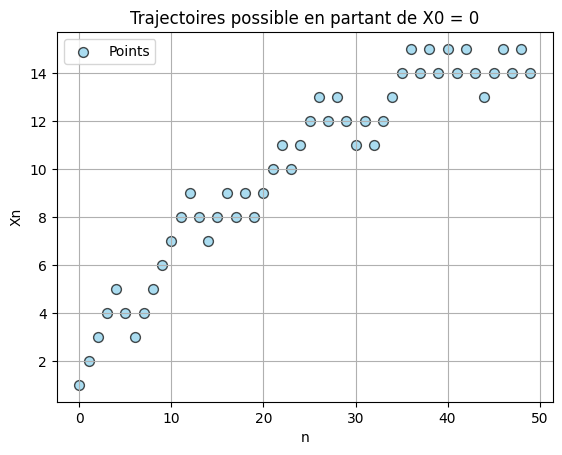

In [75]:
states = ehrenfest(50, rng = np.random.default_rng(20))

plt.scatter(range(len(states)), states, s=50, c='skyblue', edgecolor='black', alpha=0.7, label='Points')

# Ajout de titre et d'étiquettes d'axe
plt.title('Trajectoires possible en partant de X0 = 0')
plt.xlabel('n')
plt.ylabel('Xn')

# Affichage de la légende
plt.legend()

# Affichage du plot
plt.grid(True)
plt.show()

6\. Simulate a trajectory of the chain starting in state $0$ for $n_{\max} = 5000$. Display the result in function of the time index $n$. Briefly describe the curve you obtained.

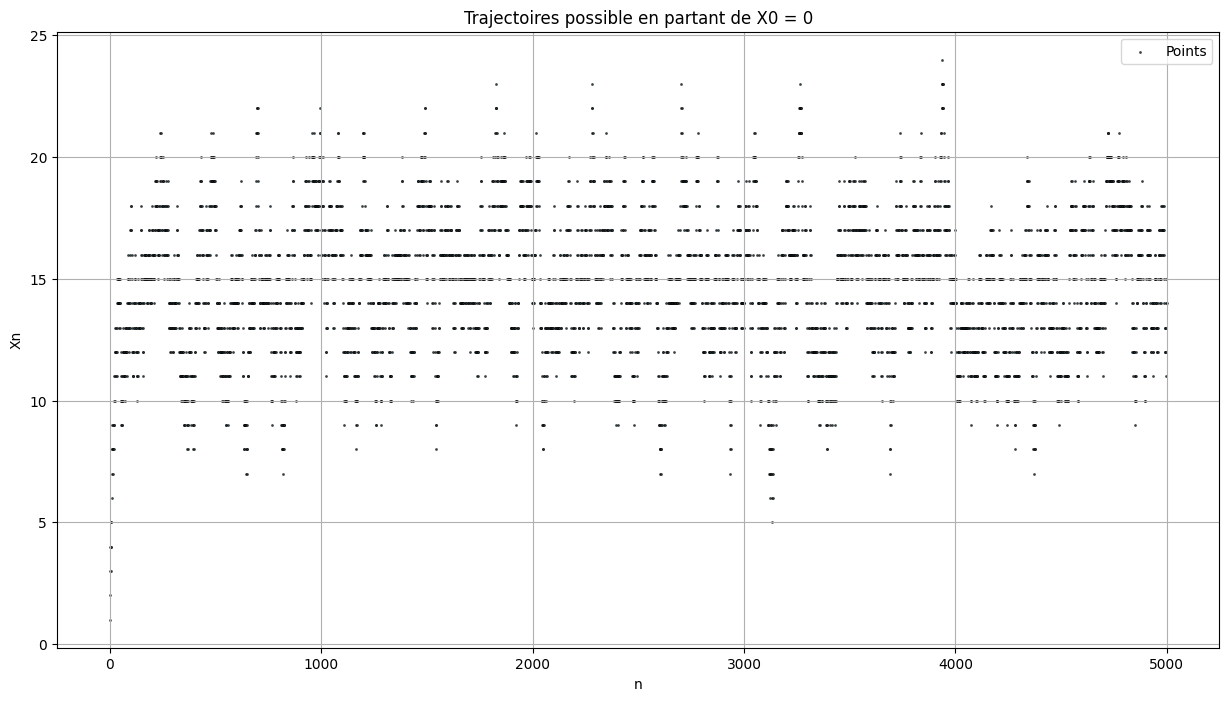

In [78]:
states = ehrenfest(5000, rng = np.random.default_rng(20))

plt.figure(figsize=(15,8))
plt.scatter(range(len(states)), states, s=1, c='skyblue', edgecolor='black', alpha=0.7, label='Points')

# Ajout de titre et d'étiquettes d'axe
plt.title('Trajectoires possible en partant de X0 = 0')
plt.xlabel('n')
plt.ylabel('Xn')

# Affichage de la légende
plt.legend()

# Affichage du plot
plt.grid(True)
plt.show()

On observe que le systeme oscille entre des valeurs de 10 et 20. 

7\. Compare the empirical histogram of the trajectory obtained in 5. to the theoretical limit distribution $\pi$. What do you observe?

$P(X_n = j) \rightarrow \frac{1}{{E(T_j)}}$

Donc $P(X_n = 0) \rightarrow \frac{1}{{2^K}}$ on constate sur le plot de l'histogramme ci-dessous que la probabiité de revenir à l'état 0 est très faible voir null

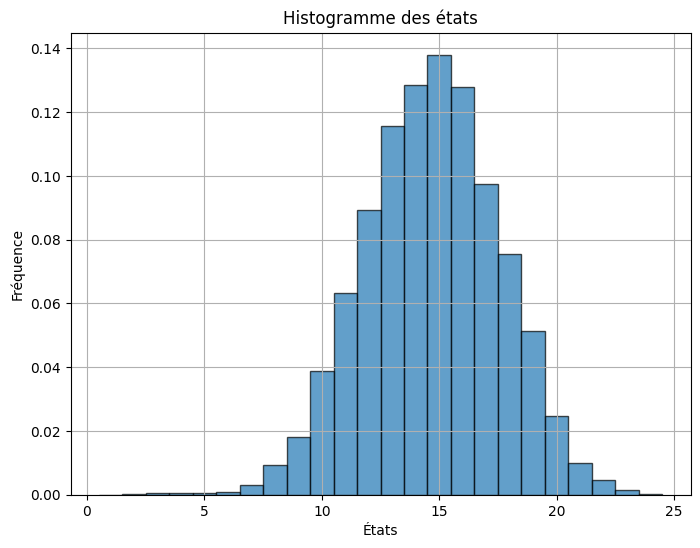

In [82]:
plt.figure(figsize=(8, 6))
plt.hist(states[1:], bins=range(min(states), max(states) + 2), align='left', alpha=0.7, edgecolor='black',  density=True)

# Ajout de titres et labels
plt.title('Histogramme des états')
plt.xlabel('États')
plt.ylabel('Fréquence')

plt.grid(True)
plt.show()

8\. a) Modify the function defined in 5. so that it returns the return time to state 0, defined as $T_{0,0} = \inf \bigl\{ n > 0, X(n) = 0 \mid X(0) = 0 \bigr\}$.

In [84]:
def ehrenfest(n_max, initial_state = 0, K=30, rng = np.random.default_rng(12345)):     
    states = []
    state = initial_state
    s = 0
    T00 = None
    for _ in range(n_max):
        proba = rng.random()
        if proba <= state/K:
            state -= 1
        else:
            state += 1
        states.append(state)
        if state == 0 and s == 0:
            T00 = _
            s += 1
    return states, T00

8\. b) [**Optional**] Run several chains (about 5, ideally in parallel) for $K = 10$, $n_{\max} = 5000$, and compare the empirical average of $T_{0,0}$ to $\pi(0)$. What do you observe?
 > Hint: a good tutorial showing how to run functions in parallel in Python is available [here](https://www.machinelearningplus.com/python/parallel-processing-python/).

8\. c) Comment on the possibility of numerically observing the chain returning to its initial state as $K$ increases.

...

---
## <a name="ex2">Exercise 2: Simulation of a discrete time homogeneous Markov chain</a> [(&#8593;)](#content)
 Let $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ be a discrete time homogeneous Markov chain defined by the following initial distribution $\mu \in \mathbb{R}^K$ and transition matrix $P \in \mathbb{R}^{K \times K}$, with $K = 3$:

$$
  \mu = [0, 1, 0], 
  %
  \quad
  %
  P = \begin{pmatrix}
   0.2 & 0.7 & 0.1 \\
   0.9 & 0 & 0.1 \\
   0.2 & 0.8 & 0 
  \end{pmatrix}.
$$

1\. What can you say about the Markov chain $X$? (irreducibility, positive recurrence, periodicity, ...). Justify each of your claim, citing the relevant results from the lecture.

2\. Write a function `simulate_dthmc` simulating the trajectory of the Markov chain $\bigl( X(n) \bigr)_{n \in \mathbb{N}}$ for $n_{\max}$ time steps. The signature of the function should include the following elements:
   - list of inputs: transition matrix $P$, initial distribution $\mu$, number of time steps $n_{\max}$, [random number generator](https://numpy.org/doc/stable/reference/random/generator.html);
   - output: array of lenght $n_{\max}$ representing the trajectory.
   
**To this end, do not use matrix vector products, which would lead to an extremely inefficient algorithm in this case.**
   

3\. Simulate a trajectory of the chain for $n_{\max} = 2000$ starting from $X(0) = 1$. Plot the histogram of the states visited by the chain.
 

4\. Determine numerically an invariant distribution $\boldsymbol{\pi}$ of the chain (*e.g.*, based on an eigendecomposition [numpy.linalg.eig](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html)). Is it unique? Compare it to the histogram obtained in 2 (superimpose graphs). What can you conclude?
 

5\. a) Compute $\mu_n \triangleq \mu P^n$, the probability distribution of $X(n)$. What is the limit of $\mu_n$ as $n$ goes to $+\infty$? Illustrate the result numerically.


5\. b) Display on the same graph the curves $n \mapsto \mu_n(i)$ for $i = 0, \dotsc , K-1$, and compare with $\pi$. Display on another graph the function $n \mapsto \Vert \mu_n - \pi \Vert_1$, where $\Vert \cdot \Vert_1$ is the $\ell_1$ norm. What does each of these curves illustrate?

6\. For each state $i \in \{0, \dotsc, K-1 \}$, simulate 100 trajectories starting from the state $i$ until the return time to $i$. For each state, compute the (empirical) average return time. Compare with its theoretical value.
 